In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import ast
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
data = pd.read_csv('biosensing_data.csv')

In [3]:
df = pd.DataFrame(data)
df.head()

,Sample_ID,Biosensor_Type,Pathogen_ID,Pathogen_Class,Microbial_Signature,Signal_Quality,Normalized_Data,Classification_Label
0,sample_0001,Electrochemical,pathogen_0001,Virus,"[0.686348465859171, 0.3519711095416459, 0.4792...",1,"[1.0, 0.5128169247104654, 0.6982014062284271]",Hepatitis
1,sample_0002,Electrochemical,pathogen_0002,Virus,"[0.511492541035177, 0.5906264985400667, 0.4373...",1,"[0.8660169198292051, 1.0, 0.7405203790625393]",Influenza
2,sample_0003,Optical,pathogen_0003,Fungi,"[0.34381169127876693, 0.3692560064866732, 0.11...",1,"[0.9310930228325897, 1.0, 0.316247859168712]",Aspergillus
3,sample_0004,Electrochemical,pathogen_0004,Bacteria,"[0.6662803385340104, 0.46467267273050455, 0.45...",1,"[1.0, 0.6974131545783041, 0.6764207193004899]",L. monocytogenes
4,sample_0005,Electrochemical,pathogen_0005,Bacteria,"[0.7666226216524994, 0.38892208052687616, 0.38...",1,"[1.0, 0.5073188157277855, 0.5053355232959593]",Salmonella


In [4]:
label_encoder = LabelEncoder()
df['classification_label_number'] = label_encoder.fit_transform(df.iloc[:, -1])
df.head()

,Sample_ID,Biosensor_Type,Pathogen_ID,Pathogen_Class,Microbial_Signature,Signal_Quality,Normalized_Data,Classification_Label,classification_label_number
0,sample_0001,Electrochemical,pathogen_0001,Virus,"[0.686348465859171, 0.3519711095416459, 0.4792...",1,"[1.0, 0.5128169247104654, 0.6982014062284271]",Hepatitis,4
1,sample_0002,Electrochemical,pathogen_0002,Virus,"[0.511492541035177, 0.5906264985400667, 0.4373...",1,"[0.8660169198292051, 1.0, 0.7405203790625393]",Influenza,5
2,sample_0003,Optical,pathogen_0003,Fungi,"[0.34381169127876693, 0.3692560064866732, 0.11...",1,"[0.9310930228325897, 1.0, 0.316247859168712]",Aspergillus,0
3,sample_0004,Electrochemical,pathogen_0004,Bacteria,"[0.6662803385340104, 0.46467267273050455, 0.45...",1,"[1.0, 0.6974131545783041, 0.6764207193004899]",L. monocytogenes,6
4,sample_0005,Electrochemical,pathogen_0005,Bacteria,"[0.7666226216524994, 0.38892208052687616, 0.38...",1,"[1.0, 0.5073188157277855, 0.5053355232959593]",Salmonella,8


In [5]:
label_encoder = LabelEncoder()
df['Biosensor_Type_number'] = label_encoder.fit_transform(df.iloc[:, 1])
df.head()

,Sample_ID,Biosensor_Type,Pathogen_ID,Pathogen_Class,Microbial_Signature,Signal_Quality,Normalized_Data,Classification_Label,classification_label_number,Biosensor_Type_number
0,sample_0001,Electrochemical,pathogen_0001,Virus,"[0.686348465859171, 0.3519711095416459, 0.4792...",1,"[1.0, 0.5128169247104654, 0.6982014062284271]",Hepatitis,4,0
1,sample_0002,Electrochemical,pathogen_0002,Virus,"[0.511492541035177, 0.5906264985400667, 0.4373...",1,"[0.8660169198292051, 1.0, 0.7405203790625393]",Influenza,5,0
2,sample_0003,Optical,pathogen_0003,Fungi,"[0.34381169127876693, 0.3692560064866732, 0.11...",1,"[0.9310930228325897, 1.0, 0.316247859168712]",Aspergillus,0,2
3,sample_0004,Electrochemical,pathogen_0004,Bacteria,"[0.6662803385340104, 0.46467267273050455, 0.45...",1,"[1.0, 0.6974131545783041, 0.6764207193004899]",L. monocytogenes,6,0
4,sample_0005,Electrochemical,pathogen_0005,Bacteria,"[0.7666226216524994, 0.38892208052687616, 0.38...",1,"[1.0, 0.5073188157277855, 0.5053355232959593]",Salmonella,8,0


C:\Users\Akanksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Akanksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Akanksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Akanksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory le

Text(0.5, 1.0, 'KMeans cluster')

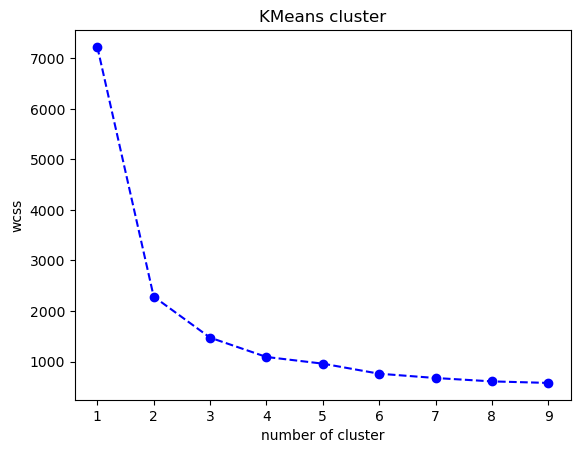

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss =[]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Biosensor_Type_number', 'classification_label_number']])
    wcss.append(kmeans.inertia_)

#plot elbow method
plt.plot(range(1,10), wcss, marker='o', color='b', linestyle='--')
plt.xlabel('number of cluster')
plt.ylabel('wcss')
plt.title('KMeans cluster')

In [13]:
#running clustering
n_clusters=2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(df[['Biosensor_Type_number', 'classification_label_number']])
centroids = kmeans.cluster_centers_

data['clusters'] = clusters

C:\Users\Akanksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [15]:
# Calculate silhouette scores
sample_silhouette_values = silhouette_samples(df[['Biosensor_Type_number', 'classification_label_number']], clusters)
silhouette_avg = silhouette_score(df[['Biosensor_Type_number', 'classification_label_number']], clusters)

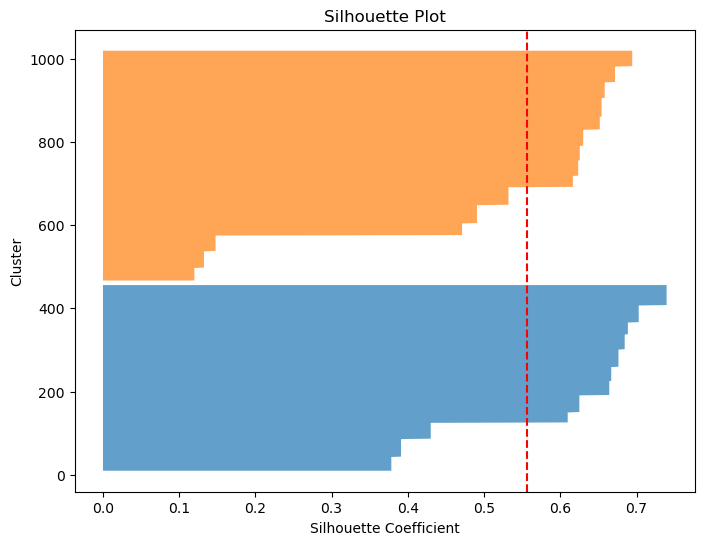

In [17]:
# Silhouette plot
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color='red', linestyle='--')
plt.title('Silhouette Plot')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')
plt.show()

In [ ]:
################################################################################################################

In [19]:
# Convert the string representation of lists to actual lists
df['Microbial_Signature'] = df['Microbial_Signature'].apply(ast.literal_eval)

# Expand the list of arrays into separate columns
df_expanded = pd.DataFrame(df['Microbial_Signature'].tolist(), columns=['Feature1', 'Feature2', 'Feature3'])

print(df_expanded.head())  # Check the first few rows

   Feature1  Feature2  Feature3
0  0.686348  0.351971  0.479209
1  0.511493  0.590626  0.437371
2  0.343812  0.369256  0.116776
3  0.666280  0.464673  0.450686
4  0.766623  0.388922  0.387402


C:\Users\Akanksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Akanksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Akanksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Akanksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory le

Text(0.5, 1.0, 'KMeans cluster')

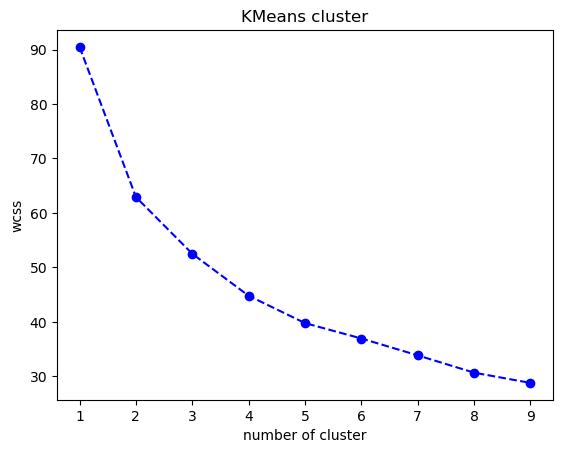

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss =[]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_expanded)
    wcss.append(kmeans.inertia_)

#plot elbow method
plt.plot(range(1,10), wcss, marker='o', color='b', linestyle='--')
plt.xlabel('number of cluster')
plt.ylabel('wcss')
plt.title('KMeans cluster')

In [23]:
#running clustering
n_clusters=9
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(df_expanded)
centroids = kmeans.cluster_centers_

data['clusters'] = clusters

C:\Users\Akanksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [25]:
# Calculate silhouette scores
sample_silhouette_values = silhouette_samples(df_expanded, clusters)
silhouette_avg = silhouette_score(df_expanded, clusters)

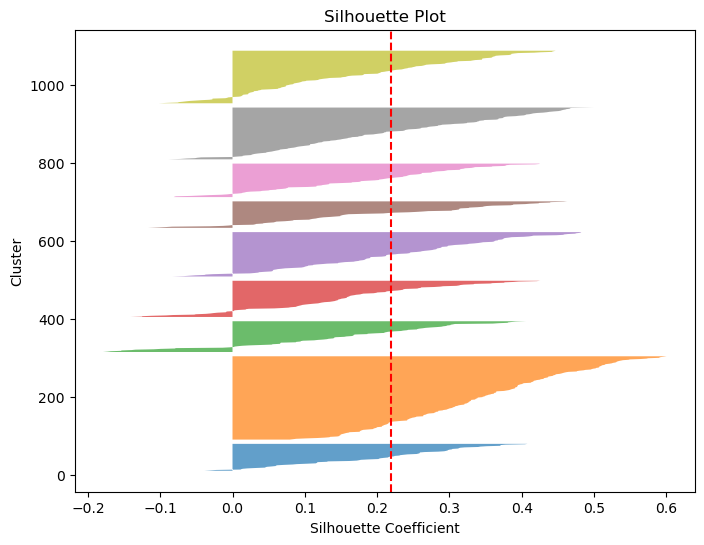

In [27]:
# Silhouette plot
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color='red', linestyle='--')
plt.title('Silhouette Plot')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')
plt.show()